# 6. Análise de correlações entre variáveis de interesse

A proposta aqui é de analisar correlações entre variáveis consideradas importantes pela literatura e pela equipe de negócio para compreender o SFA.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.api as sm

In [2]:
df_dados_gerais = pd.read_csv('../data/familia_acolhedora/dados_gerais_tratado.csv')

In [3]:
df_dados_gerais.columns.tolist()

['IBGE',
 'NU_IDENTIFICADOR',
 'municipio',
 'uf',
 'data_implementacao_unidade',
 'Latitude',
 'Longitude',
 'natureza_unidade',
 'custo_manutencao',
 'servico_regulamentado',
 'ano_implementacao_servico',
 'subsidio_valor_mensal',
 'subsidio_itens_manutencao',
 'subsidio_mobiliario_transporte',
 'subsidio_isencao_imposto_taxa',
 'subsidio_outros',
 'subsidio_nao_repassa',
 'subsidio_outros_quais',
 'fam_aceita_vinculo_irmaos',
 'qtd_criancas_acolhidas',
 'qtd_criancas_acolhidas_12meses',
 'qtd_masc_0_2',
 'qtd_masc_3_5',
 'qtd_masc_6_11',
 'qtd_masc_12_13',
 'qtd_masc_14_15',
 'qtd_masc_16_17',
 'qtd_masc_acima_18',
 'qtd_masc_total',
 'qtd_fem_0_2',
 'qtd_fem_3_5',
 'qtd_fem_6_11',
 'qtd_fem_12_13',
 'qtd_fem_14_15',
 'qtd_fem_16_17',
 'qtd_fem_acima_18',
 'qtd_refugiados_imigrantes',
 'qtd_venezuelanos',
 'qtd_criancas_tempo_servico_menos_1mes',
 'qtd_criancas_tempo_servico_1_3meses',
 'qtd_criancas_tempo_servico_4_6meses',
 'qtd_criancas_tempo_servico_7_12meses',
 'qtd_criancas_te

## 6.1. Matriz de correlação entre as principais variáveis da base de dados

In [4]:
cols_filtro = [
 'uf',
 'natureza_unidade',
 'custo_manutencao',
 'ano_implementacao_servico',       
 'servico_regulamentado',
 'subsidio_valor_mensal',
 'subsidio_itens_manutencao',
 'subsidio_mobiliario_transporte',
 'subsidio_isencao_imposto_taxa',
 'subsidio_outros',
 'subsidio_nao_repassa',
 'fam_aceita_vinculo_irmaos',
 'qtd_criancas_acolhidas',
 'qtd_criancas_acolhidas_12meses',
 'qtd_masc_0_2',
 'qtd_masc_3_5',
 'qtd_masc_6_11',
 'qtd_masc_12_13',
 'qtd_masc_14_15',
 'qtd_masc_16_17',
 'qtd_masc_acima_18',
 'qtd_masc_total',
 'qtd_fem_0_2',
 'qtd_fem_3_5',
 'qtd_fem_6_11',
 'qtd_fem_12_13',
 'qtd_fem_14_15',
 'qtd_fem_16_17',
 'qtd_fem_acima_18',
 'qtd_refugiados_imigrantes',
 'qtd_venezuelanos',
 'qtd_criancas_tempo_servico_menos_1mes',
 'qtd_criancas_tempo_servico_1_3meses',
 'qtd_criancas_tempo_servico_4_6meses',
 'qtd_criancas_tempo_servico_7_12meses',
 'qtd_criancas_tempo_servico_13_18meses',
 'qtd_criancas_tempo_servico_19_24meses',
 'qtd_criancas_tempo_servico_25_48meses',
 'qtd_criancas_tempo_servico_49_72meses',
 'qtd_criancas_tempo_mais_72meses',
 'qtd_criancas_deficiencia',
 'qtd_criancas_transt_sofri_psiquico',
 'qtd_criancas_necessidade_especial',
 'qtd_adoles_socioeducativo',
 'qtd_criancas_traj_de_rua',
 'qtd_criancas_indigenas',
 'qtd_criancas_outros_povos_trad',
 'qtd_criancas_dependencia_drogas',
 'qtd_criancas_pretas',
 'qtd_criancas_pardas',
 'qtd_criancas_brancas',
 'qtd_criancas_amarelas',
 'qtd_criancas_raca_indigenas',
 'qtd_oriundos_pbf',
 'qtd_oriundos_fam_menos_1sm',
 'divulgacao_outdoors_busdoors',
 'divulgacao_materiais_grande_circ',
 'divulgacao_radio_tv_impressa',
 'divulgacao_eventos_palestras',
 'divulgacao_redes_sociais',
 'divulgacao_articulacao_liderancas',
 'divulgacao_nao_faz',
 'ch_capacitacao_inicial',
 'selecao_fam_reunioes',
 'selecao_fam_analise_doc',
 'selecao_fam_entrevistas',
 'selecao_fam_visitas_domiciliares',
 'selecao_fam_nao_faz',
 'capac_ini_conti_fam_encontros_grupos',
 'capac_ini_conti_fam_encontros_indivi',
 'capac_ini_conti_fam_paletras',
 'capac_ini_conti_fam_rodas_conversa',
 'capac_ini_conti_fam_nao_faz',
 'acompanhamento_fam_aprox_supervi',
 'acompanhamento_fam_visitas_domicil',
 'acompanhamento_fam_aten_psicoss',
 'acompanhamento_fam_contato_tel',
 'ativi_sistematicas_atend_psicosso_indivi',
 'ativi_sistematicas_escuta_qualific',
 'ativi_sistematicas_acompanh_escolar',
 'ativi_sistematicas_acompanh_saude',
 'ativi_sistematicas_encaminhc_docs',
 'ativi_sistematicas_encaminhc_qualif_prof',
 'ativi_sistematicas_identifi_fam_nat_exten',
 'ativi_sistematicas_viabili_encon_fam_ori',
 'ativi_sistematicas_constr_plano_acomp_fam_ori',
 'ativi_sistematicas_atend_psicosso_indiv_fam_ori',
 'ativi_sistematicas_reunioes_fam_ori',
 'ativi_sistematicas_entrevis_fam_ori',
 'ativi_sistematicas_visi_domic_fam_ori',
 'ativi_sistematicas_genograma_ecomapa',
 'ativi_sistematicas_relat_trimes_judic',
 'ativi_sistematicas_estudo_caso',
 'ativi_sistematicas_encaminhc_rede',
 'ativi_sistematicas_discuss_casos_rede',
 'ativi_sistematicas_nao_faz',
 'freq_acompanh_fam_acolhedora',
 'qtd_fam_processo_habilitacao',
 'qtd_fam_aptas_ou_acolhendo',
 'num_atual_fam_suficiente',
 'imovel_sede_saf',
 'espaco_fisico_sala_atendimento',
 'espaco_fisico_espaco_reunioes',
 'espaco_fisico_sala_equip_tec',
 'espaco_fisico_sala_coord_adm',
 'espaco_fisico_area_recepcao',
 'espaco_fisico_copa',
 'equipamentos_veiculo_exclusivo',
 'equipamentos_veiculo_compartilhado',
 'equipamentos_acervo_bibliog',
 'equipamentos_mater_pedago',
 'equipamentos_tel_fixo',
 'equipamentos_cel',
 'equipamentos_impressora',
 'equipamentos_de_som',
 'equipamentos_proj_imagens',
 'equipamentos_bebedouro',
 'equipamentos_comput_internet',
 'equipamentos_qtd_comput_internet',
 'equipe_tec_exclusiva_saf',
 'coordenador_saf_situacao',
 'capaci_equipe_tec_saf_presencial',
 'capaci_equipe_tec_saf_ead',
 'capaci_equipe_tec_saf_nao_faz',
 'capaci_equipe_tec_saf_presencial_qtd',
 'capaci_equipe_tec_saf_ead_qtd']

In [5]:
df_filtrado = df_dados_gerais[cols_filtro]

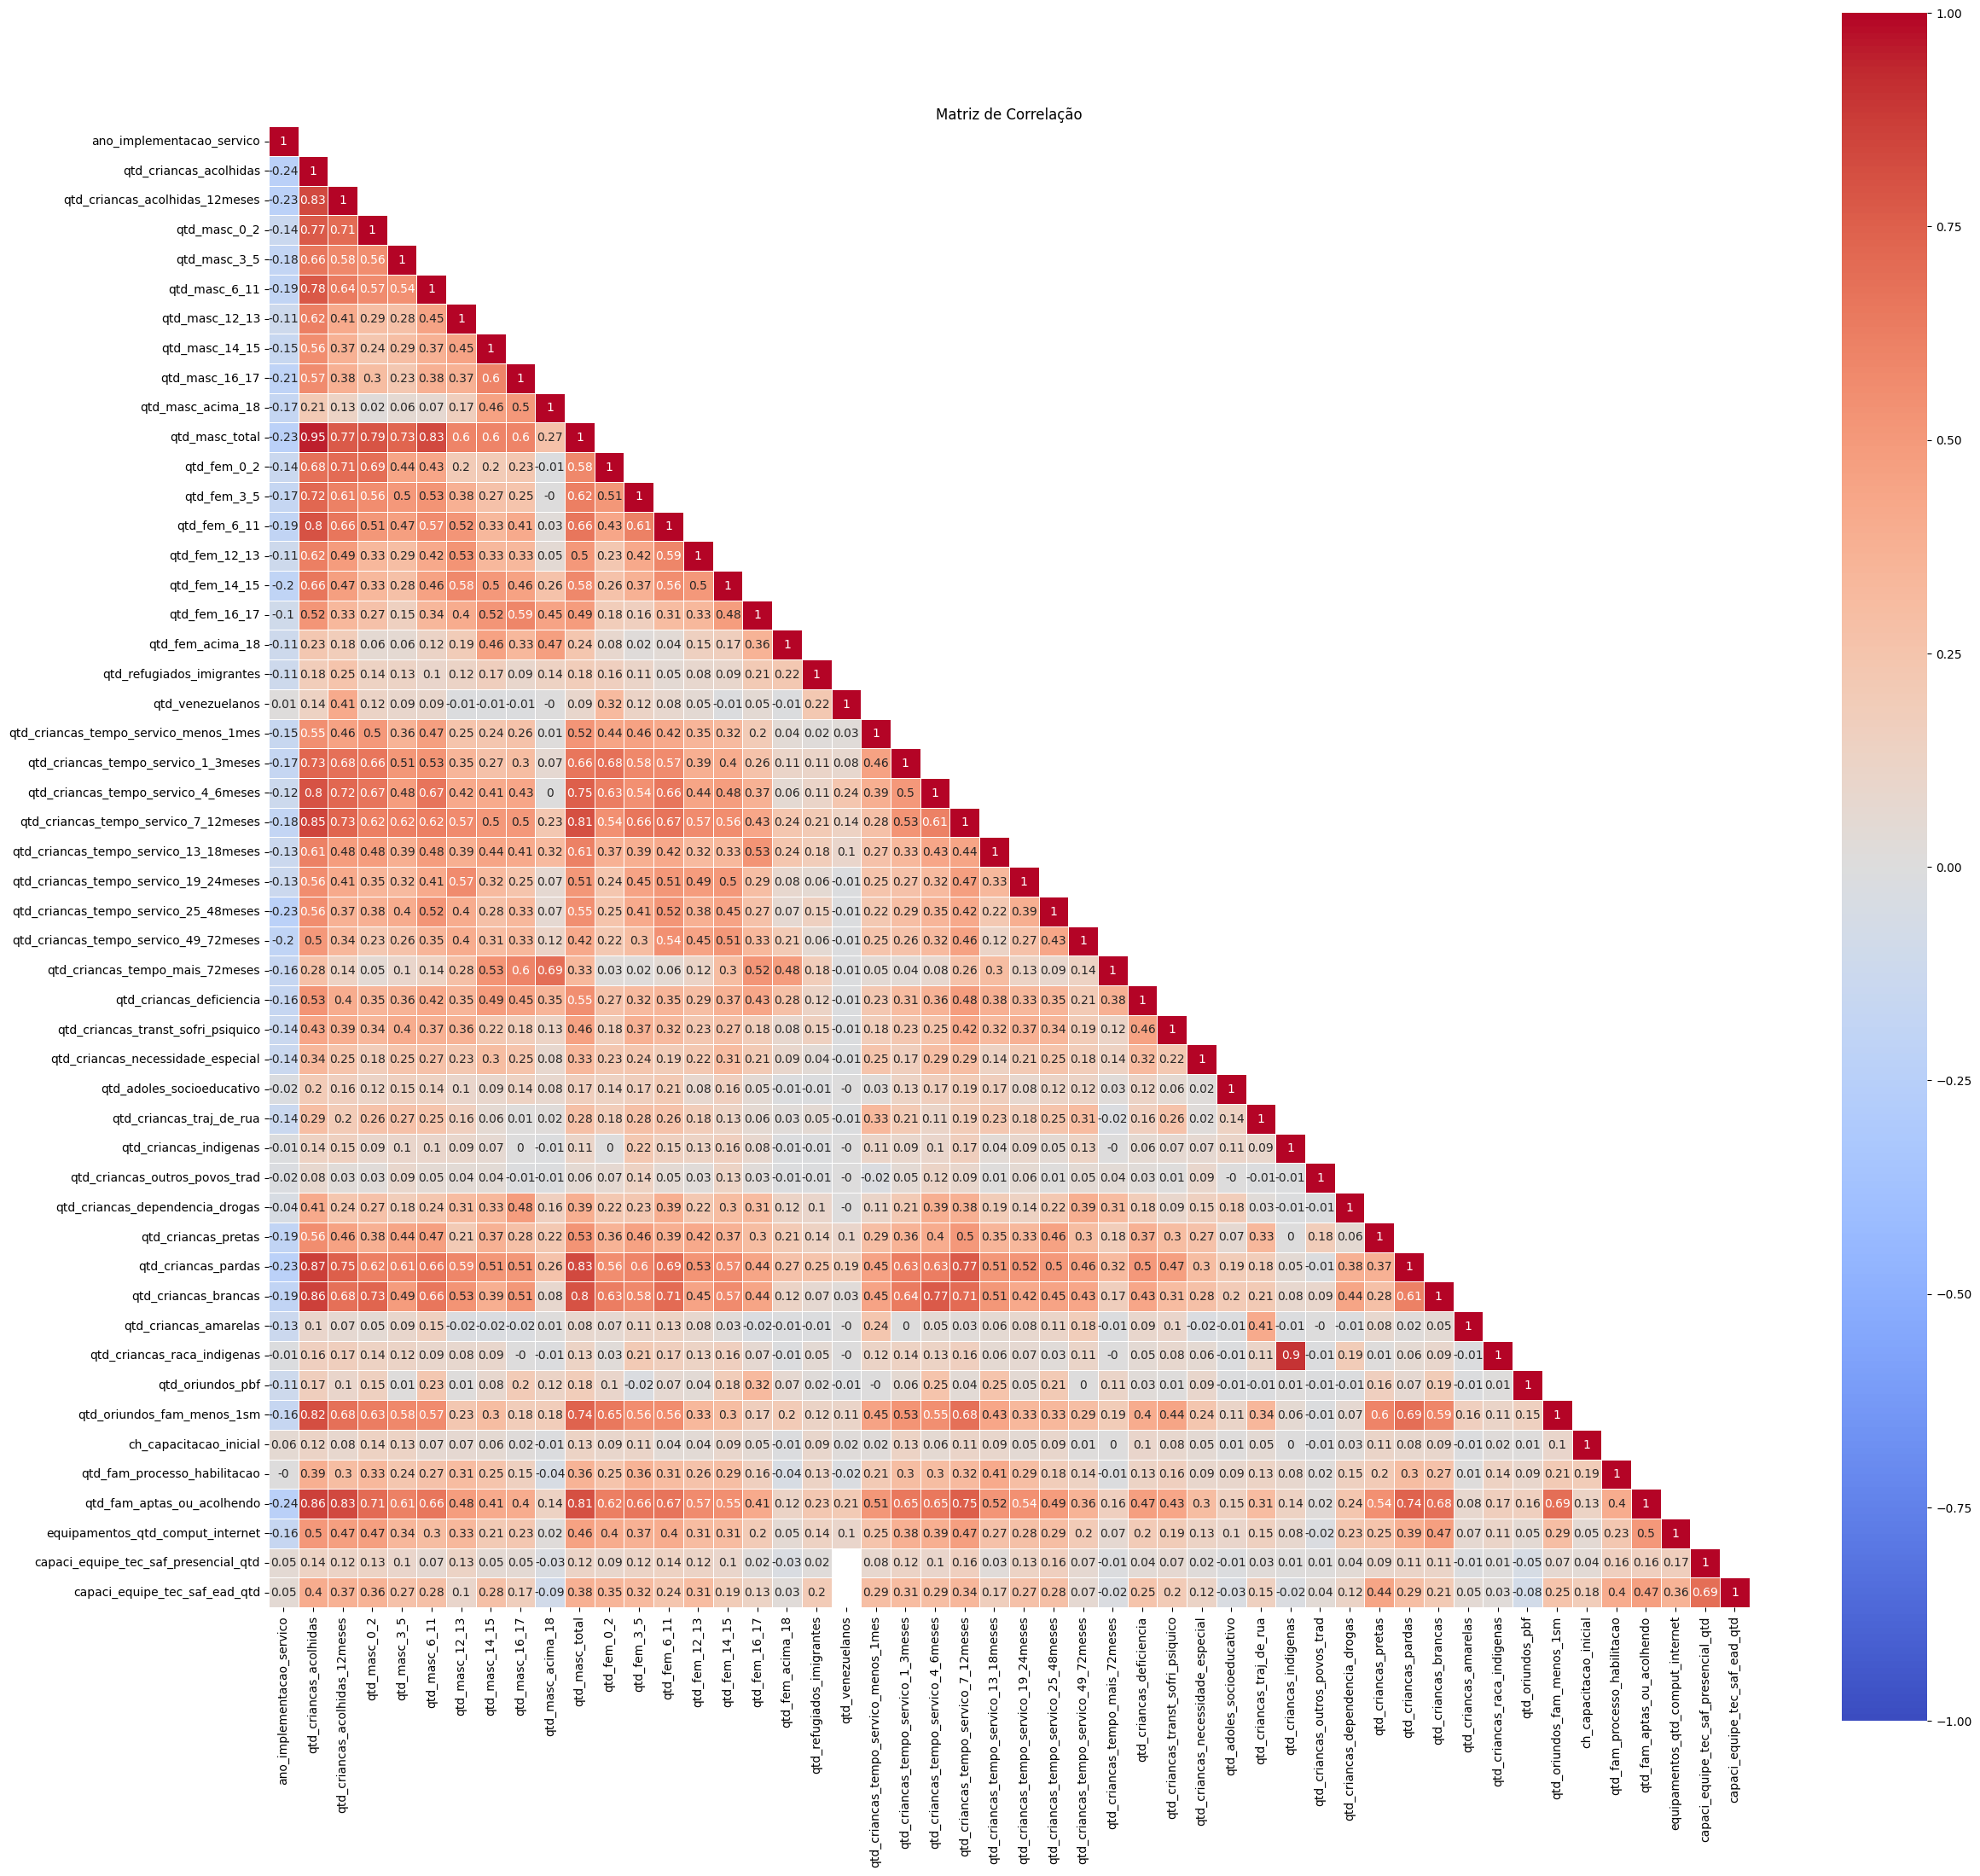

In [11]:
# Criar a matriz de correlação com colunas numéricas explicitamente
matriz_correlacao_geral = df_filtrado.corr(numeric_only=True).round(2)

# Definir uma máscara para ocultar a metade superior
mask = np.triu(np.ones_like(matriz_correlacao_geral, dtype=bool), k=1)

# Configurar o gráfico de correlação
plt.figure(figsize=(28, 26))
sns.heatmap(
    matriz_correlacao_geral,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.5
)
plt.title('Matriz de Correlação')
plt.show()

In [7]:
# Define o limiar de correlação
limiar = 0.8

# Encontra pares de colunas com correlação acima do limiar (ignorando a diagonal)
correlacoes_altas = set()
for i in range(len(matriz_correlacao_geral.columns)):
    for j in range(i + 1, len(matriz_correlacao_geral.columns)):
        if abs(matriz_correlacao_geral.iloc[i, j]) > limiar:
            # Ordena os pares para evitar duplicatas
            var1 = matriz_correlacao_geral.index[i]
            var2 = matriz_correlacao_geral.columns[j]
            if var1 > var2:
                var1, var2 = var2, var1
            # Adiciona o par ordenado ao conjunto
            correlacoes_altas.add((var1, var2, matriz_correlacao_geral.iloc[i, j]))

# Exibe as correlações altas
df_correlacoes = pd.DataFrame(correlacoes_altas, columns=["Variável 1", "Variável 2", "Correlação"])
df_correlacoes = df_correlacoes.sort_values(by="Correlação", ascending=False).reset_index(drop=True)
df_correlacoes

,Variável 1,Variável 2,Correlação
0,qtd_criancas_acolhidas,qtd_masc_total,0.95
1,qtd_criancas_indigenas,qtd_criancas_raca_indigenas,0.90
2,qtd_criancas_acolhidas,qtd_criancas_pardas,0.87
3,qtd_criancas_acolhidas,qtd_fam_aptas_ou_acolhendo,0.86
4,qtd_criancas_acolhidas,qtd_criancas_brancas,0.86
5,qtd_criancas_acolhidas,qtd_criancas_tempo_servico_7_12meses,0.85
6,qtd_criancas_acolhidas,qtd_criancas_acolhidas_12meses,0.83
7,qtd_criancas_pardas,qtd_masc_total,0.83
8,qtd_masc_6_11,qtd_masc_total,0.83
9,qtd_criancas_acolhidas_12meses,qtd_fam_aptas_ou_acolhendo,0.83


## 6.2. Correlação entre subsídio mensal e quantidade de famílias aptas/acolhendo

A correlação será realizada a partir dos dados desagregados.

In [8]:
df_dados_gerais['qtd_fam_aptas_ou_acolhendo'].apply(type).unique()

array([<class 'int'>], dtype=object)

In [9]:
# Transformar os dados em números
df_dados_gerais['subsidio_valor_mensal'] = pd.to_numeric(df_dados_gerais['subsidio_valor_mensal'], errors='coerce')

In [10]:
df_dados_gerais['subsidio_valor_mensal'].isna().sum()

64

In [11]:
# Como há apenas 64 nulos em um universo de 620 linhas, atribuí 0 aos valores nulos, supondo que não há subsídio mensal - 
# ainda que a resposta pode ter sido Não Sei
df_dados_gerais['subsidio_valor_mensal'].fillna(0, inplace=True)

In [12]:
# Conforme visto em notebook anterior, há valores outliers no dataframe
df_dados_gerais['subsidio_valor_mensal'].describe()

count      620.000000
mean      1283.346774
std       3370.194269
min          0.000000
25%        688.000000
50%       1320.000000
75%       1320.000000
max      79200.000000
Name: subsidio_valor_mensal, dtype: float64

In [13]:
# Filtrar para manter apenas valores iguais ou abaixo de 13000
df_sem_outliers = df_dados_gerais[df_dados_gerais['subsidio_valor_mensal'] < 13000]

# Verificar quantas linhas foram removidas
removidas = len(df_dados_gerais) - len(df_sem_outliers)
print(f"Total de outliers removidos: {removidas}")

Total de outliers removidos: 3


In [14]:
df_sem_outliers[['subsidio_valor_mensal', 'qtd_fam_aptas_ou_acolhendo']].isna().sum()

subsidio_valor_mensal         0
qtd_fam_aptas_ou_acolhendo    0
dtype: int64

In [15]:
# Calcular o índice de correlação de Pearson
correlacao_subsidio_qtd_fam = df_sem_outliers['subsidio_valor_mensal'].corr(df_sem_outliers['qtd_fam_aptas_ou_acolhendo'])
print(f"Índice de correlação de Pearson: {correlacao_subsidio_qtd_fam:.2f}")

Índice de correlação de Pearson: -0.01


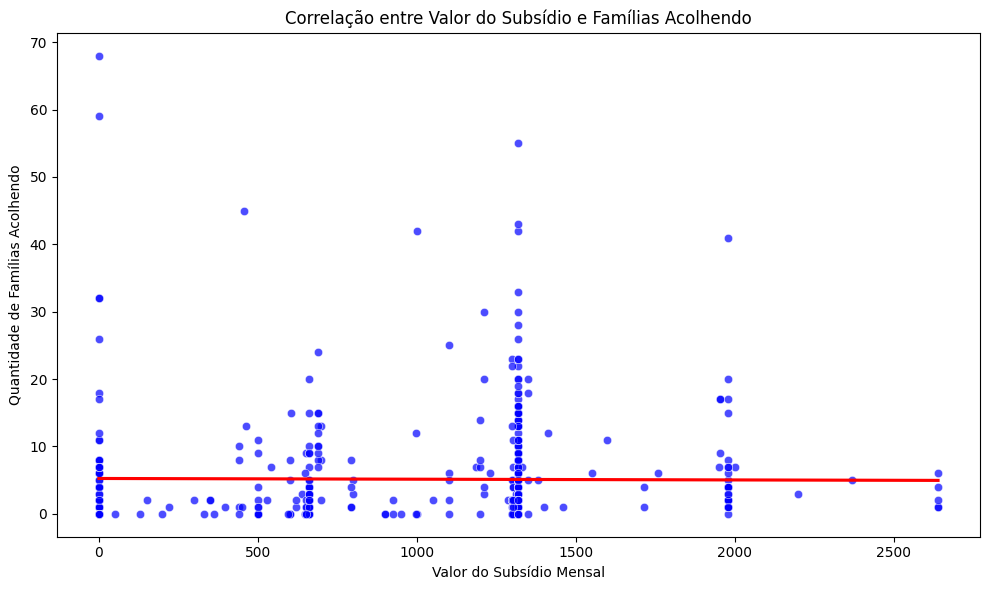

In [16]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_sem_outliers,
    x='subsidio_valor_mensal',
    y='qtd_fam_aptas_ou_acolhendo',
    alpha=0.7,
    color='blue'
)

# Adicionar uma linha de tendência
sns.regplot(
    data=df_sem_outliers,
    x='subsidio_valor_mensal',
    y='qtd_fam_aptas_ou_acolhendo',
    scatter=False,
    color='red',
    ci=None
)

# Configurar o gráfico
plt.title('Correlação entre Valor do Subsídio e Famílias Acolhendo')
plt.xlabel('Valor do Subsídio Mensal')
plt.ylabel('Quantidade de Famílias Acolhendo')
plt.tight_layout()
plt.show()

In [17]:
# Calcular o índice de correlação Spearman
correlacao_spearman = df_sem_outliers['subsidio_valor_mensal'].corr(
    df_sem_outliers['qtd_fam_aptas_ou_acolhendo'],
    method='spearman'
)
print(f"Índice de correlação (Spearman): {correlacao_spearman:.2f}")

Índice de correlação (Spearman): 0.13


## 6.3. Correlação entre quantidade de famílias aptas/acolhendo e se o número é suficiente

Além da variável 'qtd_fam_aptas_ou_acolhendo', há a 'num_atual_fam_suficiente' que se refere à resposta da unidade responsável do SFA se o número atual de famílias aptas ou acolhendo é o suficiente para a demanda. Como a variável 'num_atual_fam_suficiente' possui dados categóricos, será necessário converter para dado numérico com o objetivo de analisar a correlação entre as duas variáveis.

In [18]:
df_dados_gerais['num_atual_fam_suficiente'].value_counts()

Não                  299
Sim                  265
Não sabe informar     56
Name: num_atual_fam_suficiente, dtype: int64

In [19]:
# Filtrar linhas com respostas "Sim" ou "Não"
df_filtrado_num_atual = df_dados_gerais[df_dados_gerais['num_atual_fam_suficiente'].isin(['Sim', 'Não'])]

In [20]:
# Crie uma cópia explícita para evitar problemas
df_filtrado_num_atual2 = df_filtrado_num_atual.copy()

In [21]:
df_filtrado_num_atual2['qtd_fam_aptas_ou_acolhendo'].isnull().sum()

0

In [22]:
df_filtrado_num_atual2['num_atual_fam_suficiente'].isnull().sum()

0

In [23]:
# Verificar valores únicos nas colunas
print(df_filtrado_num_atual2['num_atual_fam_suficiente'].value_counts())
print(df_filtrado_num_atual2['qtd_fam_aptas_ou_acolhendo'].value_counts())

Não    299
Sim    265
Name: num_atual_fam_suficiente, dtype: int64
2     97
0     93
1     72
4     49
3     40
5     36
6     26
7     25
8     22
9     13
11    11
15    11
13     9
10     7
12     6
20     6
17     5
18     4
14     4
16     4
23     3
42     2
26     2
32     2
22     2
30     2
19     1
59     1
41     1
43     1
25     1
68     1
28     1
24     1
33     1
55     1
45     1
Name: qtd_fam_aptas_ou_acolhendo, dtype: int64


In [24]:
# Converter 'Sim' e 'Não' para valores binários
df_filtrado_num_atual2['num_atual_fam_suficiente'] = df_filtrado_num_atual2['num_atual_fam_suficiente'].map({'Sim': 1, 'Não': 0})

# Análise de correlação de Spearman (mais robusta para este caso)
correlacao_num_suficiente = df_filtrado_num_atual2['qtd_fam_aptas_ou_acolhendo'].corr(df_filtrado_num_atual2['num_atual_fam_suficiente'], method='spearman')
print(f"Índice de correlação (Spearman): {correlacao_num_suficiente:.2f}")

Índice de correlação (Spearman): 0.20


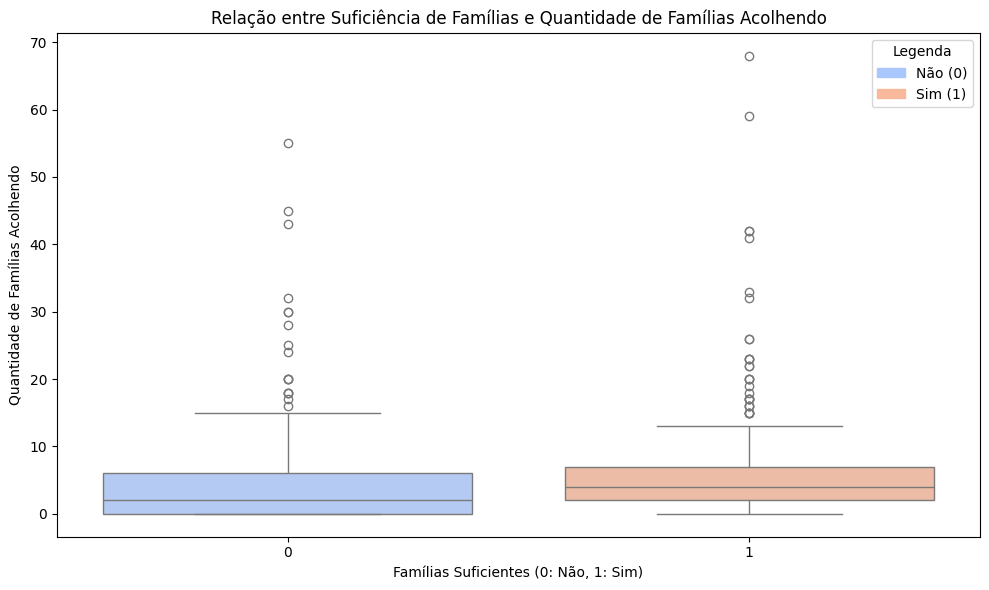

In [25]:
# Configurar o Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='num_atual_fam_suficiente',
    y='qtd_fam_aptas_ou_acolhendo',
    data=df_filtrado_num_atual2,
    hue='num_atual_fam_suficiente',
    palette=sns.color_palette("coolwarm", 2),  # Paleta com duas cores
    dodge=False
)

# Título e Rótulos
plt.title('Relação entre Suficiência de Famílias e Quantidade de Famílias Acolhendo')
plt.xlabel('Famílias Suficientes (0: Não, 1: Sim)')
plt.ylabel('Quantidade de Famílias Acolhendo')

# Adicionar Legenda
cores = sns.color_palette("coolwarm", 2)  # Obter cores da paleta
legenda = [
    mpatches.Patch(color=cores[0], label='Não (0)'),
    mpatches.Patch(color=cores[1], label='Sim (1)')
]
plt.legend(handles=legenda, title="Legenda", loc="upper right")

plt.tight_layout()
plt.show()

## 6.4. Correlação entre quantidade de famílias aptas/acolhendo e exclusividade da equipe técnica do SFA

A variável 'equipe_tec_exclusiva_saf' responde se a equipe técnica (psicólogo/assistente social) que trabalha com o SFA é exclusiva deste serviço. A resposta é única e possui quatro opções, saber:
- Todas(os) as(os) profissionais são exclusivos
- Parte da equipe é exclusiva
- Não há profissionais exclusivas(os) do serviço
- Não há equipe técnica neste Serviço

Como essa variável é categórica, será realizado um mapeamento e transformação em dummies, atribuindo -1, ou seja, um peso menor, à opção que não há equipe técnica neste Serviço.

In [26]:
df_dados_gerais['equipe_tec_exclusiva_saf'].isna().sum()

0

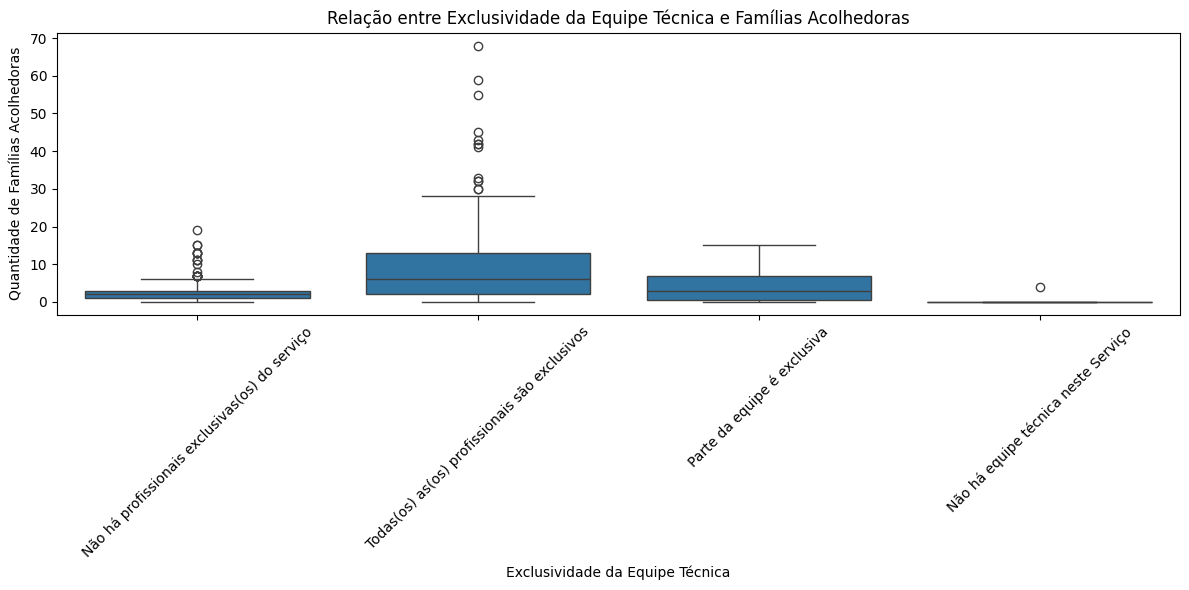

In [27]:
# Criar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='equipe_tec_exclusiva_saf',
    y='qtd_fam_aptas_ou_acolhendo',
    data=df_dados_gerais,
)
plt.title('Relação entre Exclusividade da Equipe Técnica e Famílias Acolhedoras')
plt.xlabel('Exclusividade da Equipe Técnica')
plt.ylabel('Quantidade de Famílias Acolhedoras')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Mapear as categorias para valores numéricos
mapa_categorias = {
    'Não há profissionais exclusivas(os) do serviço': 0,
    'Parte da equipe é exclusiva': 1,
    'Todas(os) as(os) profissionais são exclusivos': 2,
    'Não há equipe técnica neste Serviço': -1  # Considerar um valor representativo
}
df_dados_gerais['equipe_tec_exclusiva_num'] = df_dados_gerais['equipe_tec_exclusiva_saf'].map(mapa_categorias)

In [29]:
# Calcular o índice de correlação de Pearson
correlacao_pearson = df_dados_gerais['qtd_fam_aptas_ou_acolhendo'].corr(
    df_dados_gerais['equipe_tec_exclusiva_num'],
    method='pearson'
)
print(f"Índice de correlação (Pearson): {correlacao_pearson:.2f}")

Índice de correlação (Pearson): 0.42


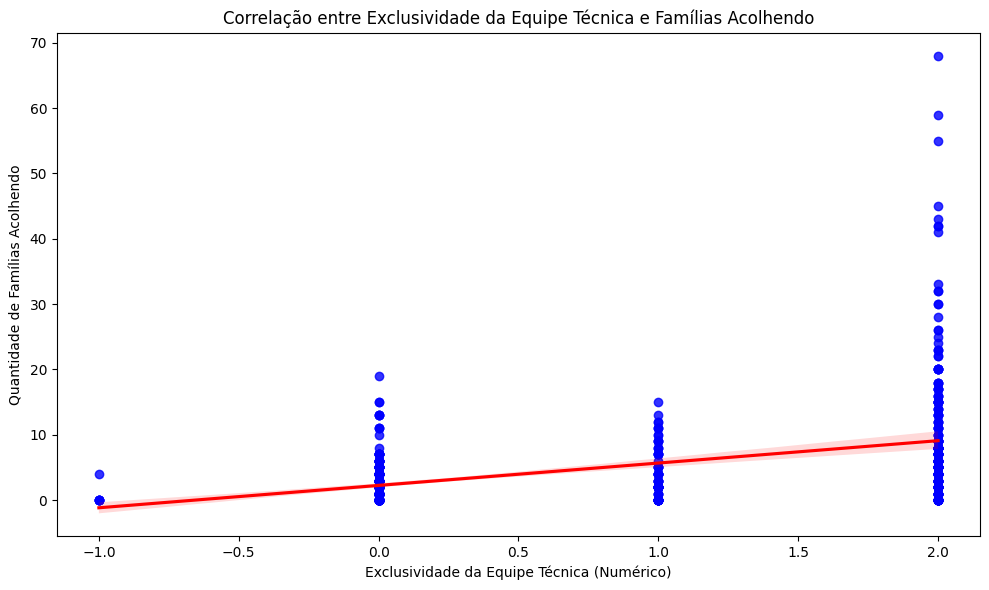

In [30]:
# Criar o gráfico de dispersão com regplot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_dados_gerais,
    x='equipe_tec_exclusiva_num',
    y='qtd_fam_aptas_ou_acolhendo',
    scatter=True,
    color='blue',
    line_kws={'color': 'red'}  # Linha de regressão em vermelho
)

# Configurações do gráfico
plt.title('Correlação entre Exclusividade da Equipe Técnica e Famílias Acolhendo')
plt.xlabel('Exclusividade da Equipe Técnica (Numérico)')
plt.ylabel('Quantidade de Famílias Acolhendo')
plt.tight_layout()
plt.show()

In [31]:
# Calcular a correlação de Spearman
correlacao_equip_tec = df_dados_gerais['qtd_fam_aptas_ou_acolhendo'].corr(df_dados_gerais['equipe_tec_exclusiva_num'], method='spearman')
print(f"Índice de correlação (Spearman): {correlacao_equip_tec:.2f}")

Índice de correlação (Spearman): 0.43


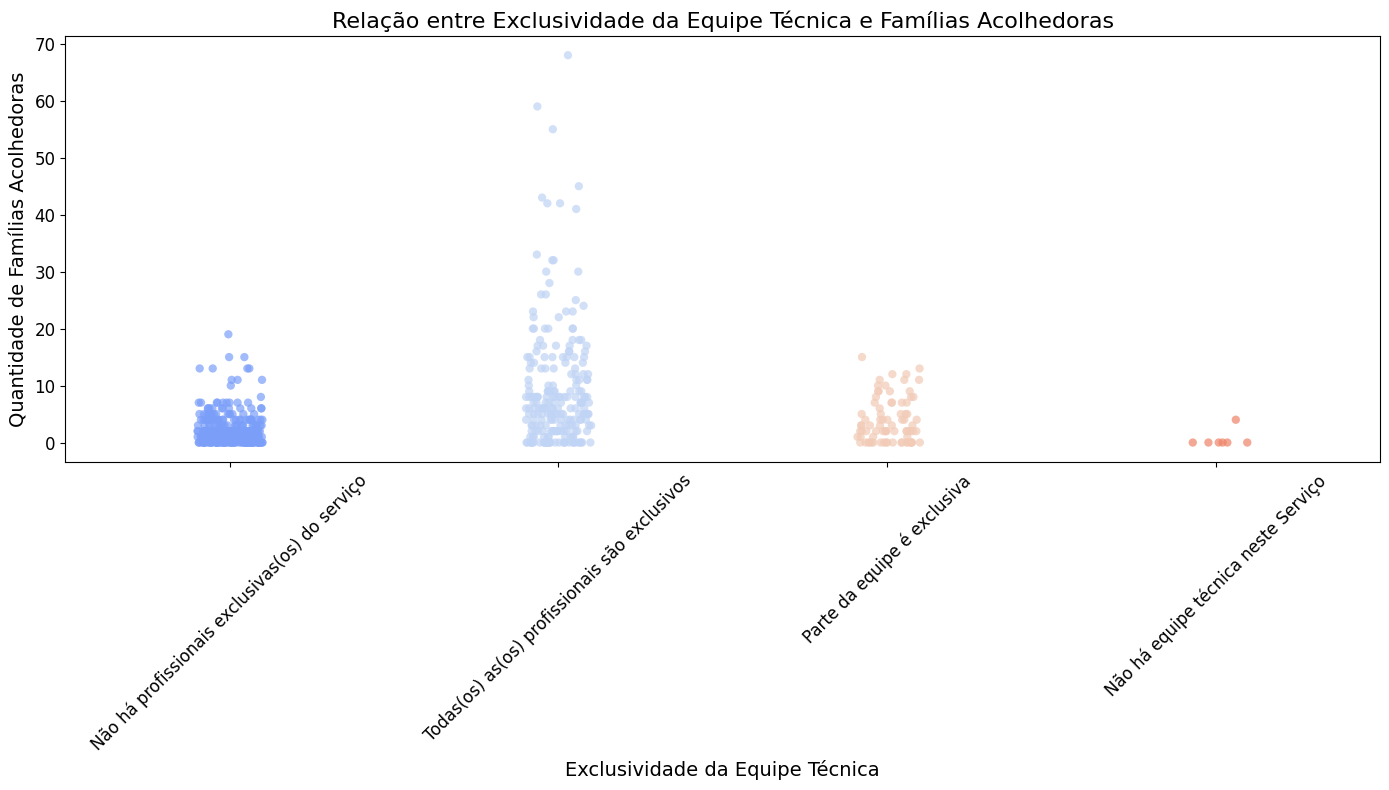

In [32]:
# Gráfico de dispersão usando stripplot
plt.figure(figsize=(14, 8))  # Aumentar o tamanho do gráfico
sns.stripplot(
    x='equipe_tec_exclusiva_saf',
    y='qtd_fam_aptas_ou_acolhendo',
    data=df_dados_gerais,
    palette='coolwarm',  # Paleta aplicada às categorias
    hue='equipe_tec_exclusiva_saf',
    jitter=True,         # Adiciona deslocamento horizontal
    alpha=0.7,           # Transparência para facilitar a leitura
    size=6,               # Reduz o tamanho dos marcadores
    legend=False
)

# Título e rótulos
plt.title('Relação entre Exclusividade da Equipe Técnica e Famílias Acolhedoras', fontsize=16)
plt.xlabel('Exclusividade da Equipe Técnica', fontsize=14)
plt.ylabel('Quantidade de Famílias Acolhedoras', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## 6.5. Correlação entre quantidade de famílias aptas/acolhendo e carga horária de capacitação inicial das famílias

In [33]:
df_dados_gerais['ch_capacitacao_inicial'].apply(type).unique()

array([<class 'int'>], dtype=object)

In [34]:
df_dados_gerais['ch_capacitacao_inicial'].isna().sum()

0

In [35]:
df_dados_gerais['ch_capacitacao_inicial'].describe()

count    620.000000
mean      11.733871
std       12.019175
min        0.000000
25%        2.000000
50%        8.000000
75%       20.000000
max      112.000000
Name: ch_capacitacao_inicial, dtype: float64

In [36]:
# Calcular os índices de correlação
correlacao_pearson_ch = df_dados_gerais['qtd_fam_aptas_ou_acolhendo'].corr(
    df_dados_gerais['ch_capacitacao_inicial'],
    method='pearson'
)

correlacao_spearman_ch = df_dados_gerais['qtd_fam_aptas_ou_acolhendo'].corr(
    df_dados_gerais['ch_capacitacao_inicial'],
    method='spearman'
)
print(f"Índice de correlação (Pearson): {correlacao_pearson_ch:.2f}")
print(f"Índice de correlação (Spearman): {correlacao_spearman_ch:.2f}")

Índice de correlação (Pearson): 0.13
Índice de correlação (Spearman): 0.27


## 6.6. Correlação entre quantidade de famílias aptas/acolhendo e quantidade de crianças/adolescentes acolhidos

In [3]:
# Calcular o índice de correlação de Pearson
correlacao_pearson = df_dados_gerais['qtd_fam_aptas_ou_acolhendo'].corr(
    df_dados_gerais['qtd_criancas_acolhidas'],
    method='pearson'
)
print(f"Índice de correlação (Pearson): {correlacao_pearson:.2f}")

Índice de correlação (Pearson): 0.86


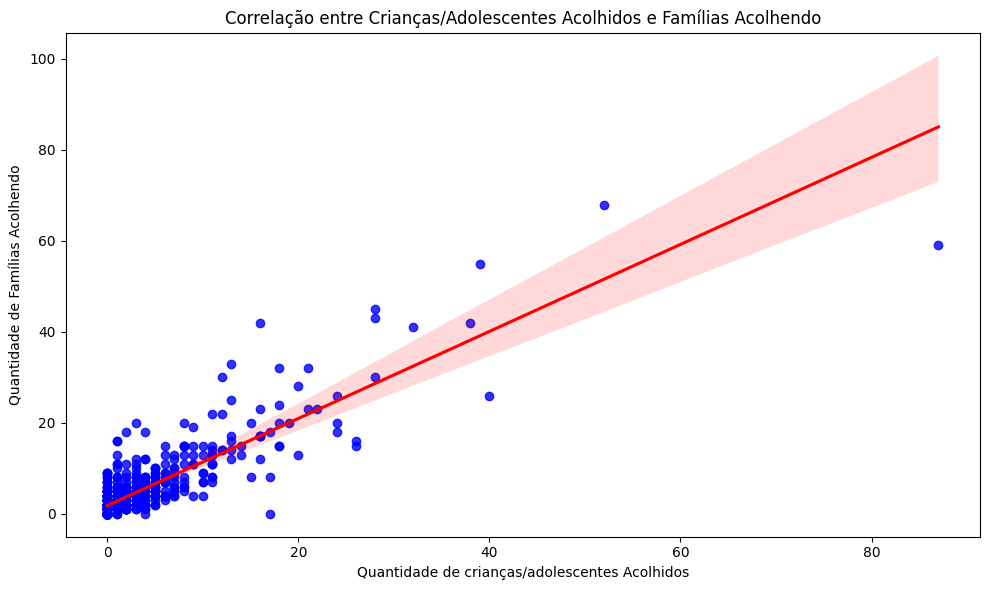

In [4]:
# Criar o gráfico de dispersão com regplot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_dados_gerais,
    x='qtd_criancas_acolhidas',
    y='qtd_fam_aptas_ou_acolhendo',
    scatter=True,
    color='blue',
    line_kws={'color': 'red'}  # Linha de regressão em vermelho
)

# Configurações do gráfico
plt.title('Correlação entre Crianças/Adolescentes Acolhidos e Famílias Acolhendo')
plt.xlabel('Quantidade de crianças/adolescentes Acolhidos')
plt.ylabel('Quantidade de Famílias Acolhendo')
plt.tight_layout()
plt.show()

## 6.7. Correlação entre frequência de acompanhamento e quantidade de famílias aptas/acolhendo

In [6]:
# Criar o mapeamento ordinal
ordem_frequencia = {
    'Semanalmente': 1,
    'Quinzenalmente': 2,
    'Mensalmente': 3,
    'Bimestralmente': 4,
    'Trimestralmente': 5,
    'Semestralmente': 6,
    'Apenas quando há necessidade': 7,
    'A família não é acompanhada': 8
}

# Aplicar o mapeamento à variável de frequência
df_dados_gerais['freq_acompanh_ordinal'] = df_dados_gerais['freq_acompanh_fam_acolhedora'].map(ordem_frequencia)

In [10]:
correlacao_freq_fam = df_dados_gerais[['freq_acompanh_ordinal', 'qtd_fam_aptas_ou_acolhendo']].corr(method='spearman')
correlacao_freq_fam

,freq_acompanh_ordinal,qtd_fam_aptas_ou_acolhendo
freq_acompanh_ordinal,1.000000,-0.267644
qtd_fam_aptas_ou_acolhendo,-0.267644,1.000000


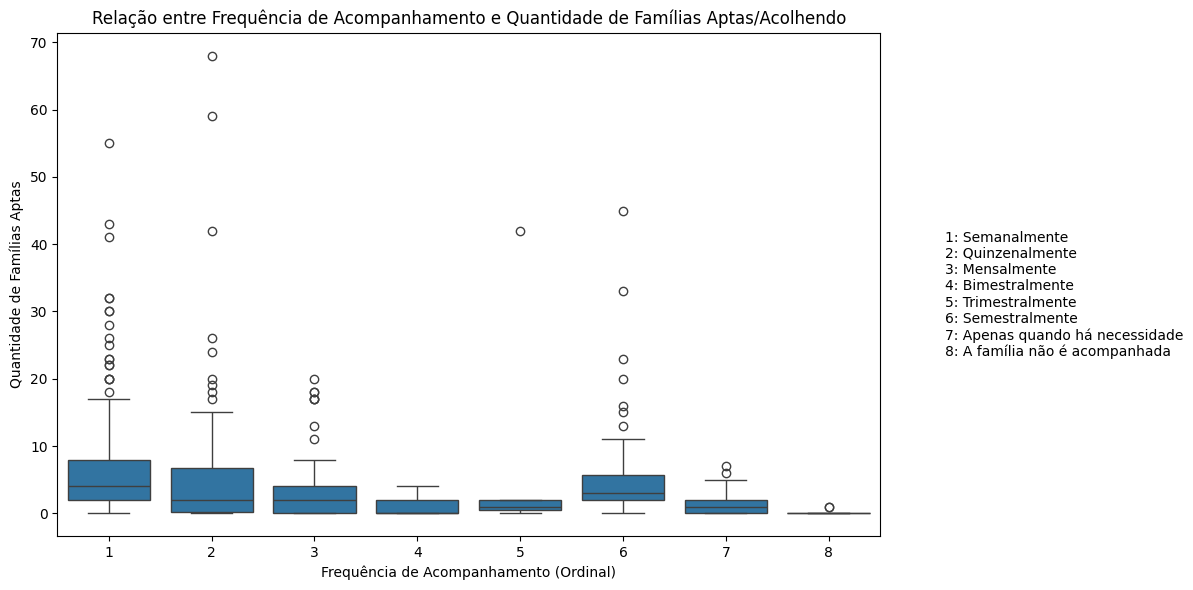

In [15]:
# Dicionário para mapear os valores ordinais de volta às frequências
legenda_frequencias = {
    1: 'Semanalmente',
    2: 'Quinzenalmente',
    3: 'Mensalmente',
    4: 'Bimestralmente',
    5: 'Trimestralmente',
    6: 'Semestralmente',
    7: 'Apenas quando há necessidade',
    8: 'A família não é acompanhada'
}

# Criar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='freq_acompanh_ordinal',
    y='qtd_fam_aptas_ou_acolhendo',
    data=df_dados_gerais
)
plt.title('Relação entre Frequência de Acompanhamento e Quantidade de Famílias Aptas/Acolhendo')
plt.xlabel('Frequência de Acompanhamento (Ordinal)')
plt.ylabel('Quantidade de Famílias Aptas')

# Adicionar a legenda personalizada ao lado do gráfico
legenda_texto = '\n'.join([f'{key}: {value}' for key, value in legenda_frequencias.items()])
plt.gcf().text(0.95, 0.5, legenda_texto, fontsize=10, verticalalignment='center', horizontalalignment='left')

# Ajustar o layout para acomodar a legenda
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Reduz o espaço do gráfico para caber a legenda
plt.show()

## 6.8. Correlação entre frequência de acompanhamento e exclusividade ou não da equipe técnica do SFA

In [16]:
# Mapear exclusividade da equipe técnica para uma escala ordinal
mapeamento_exclusividade_tec = {
    'Todas(os) as(os) profissionais são exclusivos': 1,
    'Parte da equipe é exclusiva': 2,
    'Não há profissionais exclusivas(os) do serviço': 3,
    'Não há equipe técnica neste Serviço': 4
}

In [18]:
# Criar uma nova coluna para a escala ordinal
df_dados_gerais['equipe_tec_exclusiva_ordinal'] = df_dados_gerais['equipe_tec_exclusiva_saf'].map(mapeamento_exclusividade_tec)

In [19]:
correlacao_freq_tec = df_dados_gerais[['equipe_tec_exclusiva_ordinal', 'freq_acompanh_ordinal']].corr(method='spearman')
correlacao_freq_tec

,equipe_tec_exclusiva_ordinal,freq_acompanh_ordinal
equipe_tec_exclusiva_ordinal,1.000000,0.274624
freq_acompanh_ordinal,0.274624,1.000000


In [21]:
# Calcular o índice de correlação de Pearson
correlacao_pearson = df_dados_gerais['equipe_tec_exclusiva_ordinal'].corr(
    df_dados_gerais['freq_acompanh_ordinal'],
    method='pearson'
)
print(f"Índice de correlação (Pearson): {correlacao_pearson:.2f}")

Índice de correlação (Pearson): 0.26


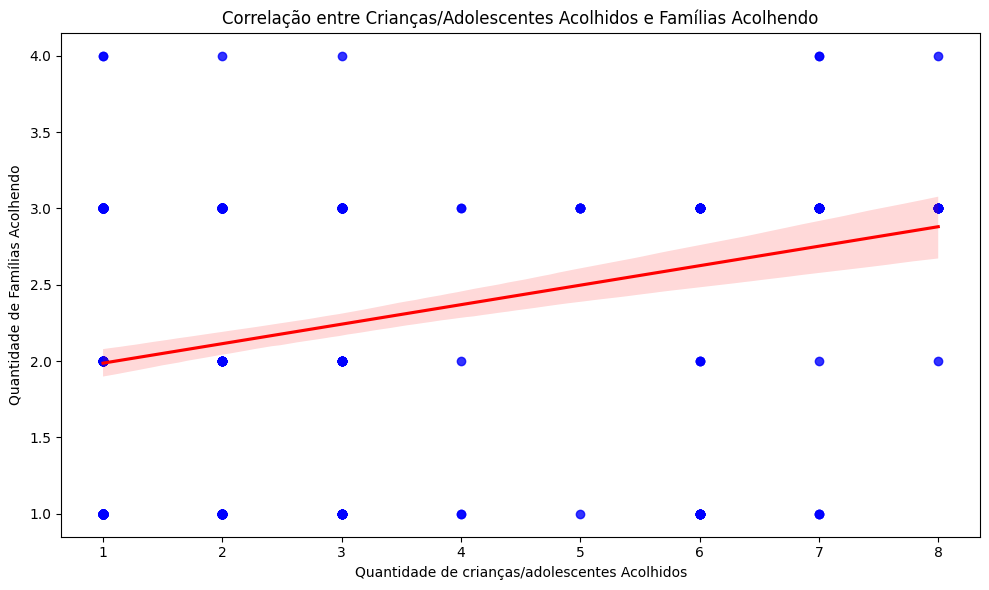

In [22]:
# Criar o gráfico de dispersão com regplot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_dados_gerais,
    x='freq_acompanh_ordinal',
    y='equipe_tec_exclusiva_ordinal',
    scatter=True,
    color='blue',
    line_kws={'color': 'red'}  # Linha de regressão em vermelho
)

# Configurações do gráfico
plt.title('Correlação entre Crianças/Adolescentes Acolhidos e Famílias Acolhendo')
plt.xlabel('Quantidade de crianças/adolescentes Acolhidos')
plt.ylabel('Quantidade de Famílias Acolhendo')
plt.tight_layout()
plt.show()

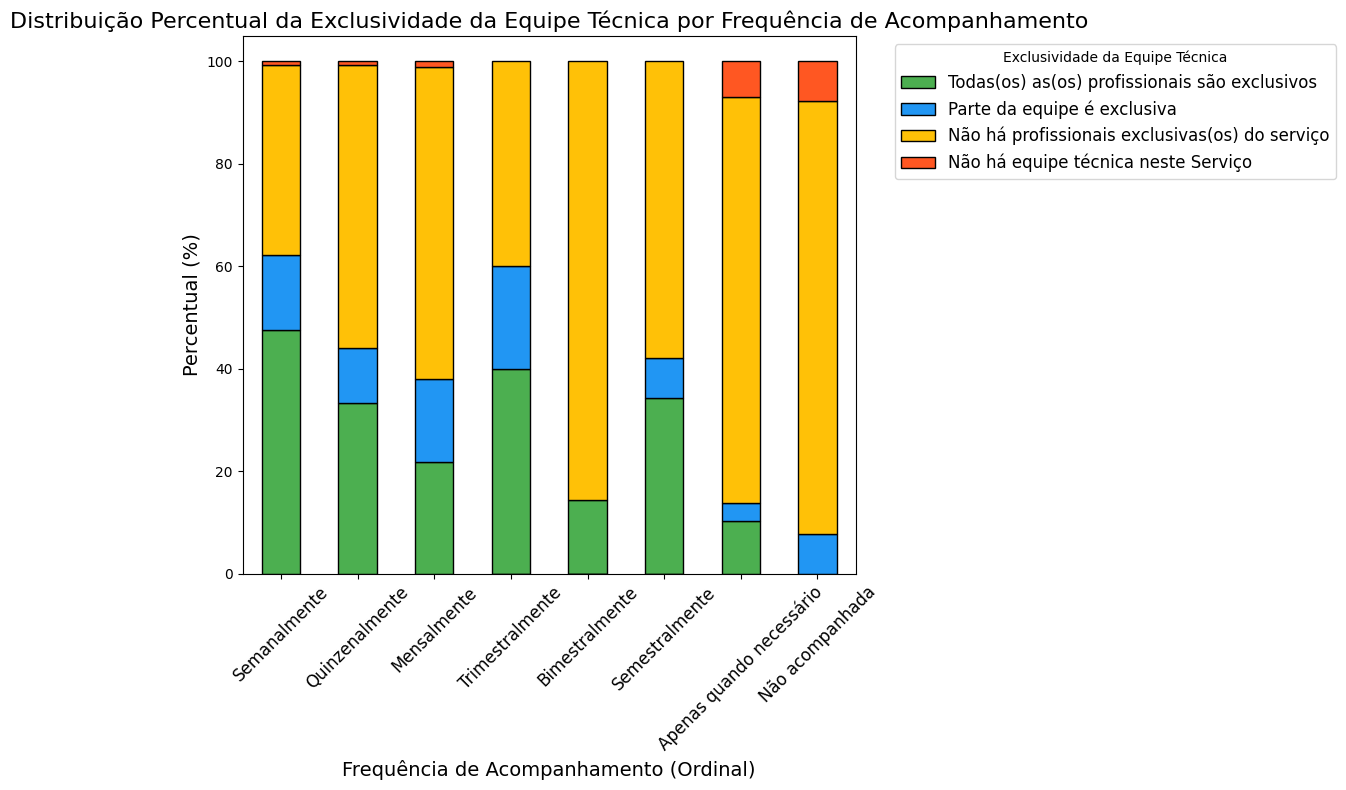

In [23]:
# Criar uma tabela de contingência
contingencia = pd.crosstab(
    df_dados_gerais['freq_acompanh_ordinal'],
    df_dados_gerais['equipe_tec_exclusiva_ordinal']
)

# Calcular as proporções para cada frequência de acompanhamento
contingencia_pct = contingencia.div(contingencia.sum(axis=1), axis=0) * 100

# Definir os rótulos para a exclusividade da equipe técnica
rótulos_exclusividade = [
    'Todas(os) as(os) profissionais são exclusivos',
    'Parte da equipe é exclusiva',
    'Não há profissionais exclusivas(os) do serviço',
    'Não há equipe técnica neste Serviço'
]

# Criar o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(12, 8))
contingencia_pct.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722'],  # Cores personalizadas
    edgecolor='black'
)

# Ajustar os rótulos e título
ax.set_title('Distribuição Percentual da Exclusividade da Equipe Técnica por Frequência de Acompanhamento', fontsize=16)
ax.set_xlabel('Frequência de Acompanhamento (Ordinal)', fontsize=14)
ax.set_ylabel('Percentual (%)', fontsize=14)
ax.set_xticks(range(len(contingencia_pct.index)))
ax.set_xticklabels(
    ['Semanalmente', 'Quinzenalmente', 'Mensalmente', 'Trimestralmente', 
     'Bimestralmente', 'Semestralmente', 'Apenas quando necessário', 'Não acompanhada'],
    rotation=45,
    fontsize=12
)

# Adicionar a legenda
ax.legend(
    title='Exclusividade da Equipe Técnica',
    labels=rótulos_exclusividade,
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=12
)

plt.tight_layout()
plt.show()

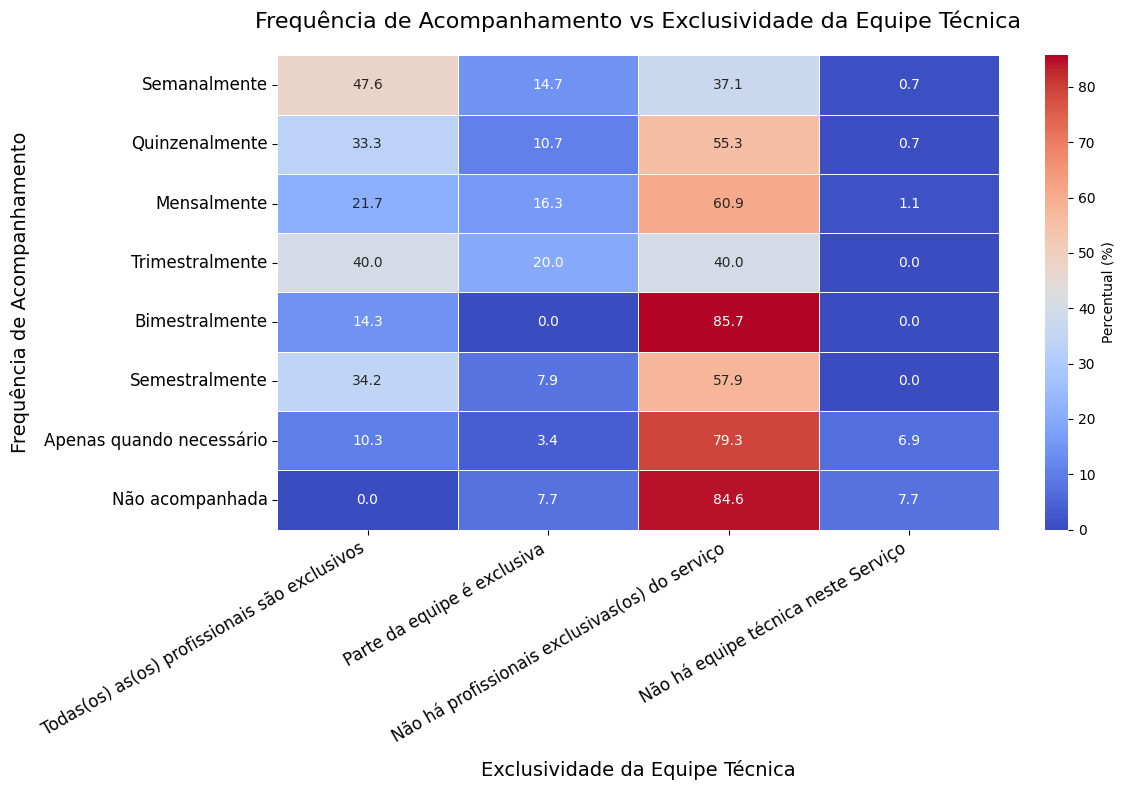

In [26]:
# Criar o heatmap com a tabela de contingência
plt.figure(figsize=(12, 8))
sns.heatmap(
    contingencia_pct,
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
    cbar_kws={'label': 'Percentual (%)'},
    linewidths=0.5  # Adicionar linhas entre os quadrados
)

# Ajustar os rótulos e título
plt.title('Frequência de Acompanhamento vs Exclusividade da Equipe Técnica', fontsize=16, pad=20)
plt.xlabel('Exclusividade da Equipe Técnica', fontsize=14, labelpad=10)
plt.ylabel('Frequência de Acompanhamento', fontsize=14, labelpad=10)

# Ajustar os rótulos do eixo X e Y
plt.xticks(
    ticks=np.arange(len(rótulos_exclusividade)) + 0.5,
    labels=rótulos_exclusividade,
    rotation=30,  # Inclinar os rótulos para melhor leitura
    ha='right',  # Alinhar os rótulos à direita
    fontsize=12
)
plt.yticks(
    ticks=np.arange(len(contingencia_pct.index)) + 0.5,
    labels=[
        'Semanalmente', 'Quinzenalmente', 'Mensalmente', 'Trimestralmente', 
        'Bimestralmente', 'Semestralmente', 'Apenas quando necessário', 'Não acompanhada'
    ],
    rotation=0,  # Manter os rótulos do eixo Y na horizontal
    fontsize=12
)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()

## 6.9. Correlação entre quantidade de famílias aptas/acolhendo e divulgação para captas novas famílias

In [30]:
# Selecionar as variáveis de divulgação e a variável dependente
variaveis_divulgacao = [
    'divulgacao_outdoors_busdoors',
    'divulgacao_materiais_grande_circ',
    'divulgacao_radio_tv_impressa',
    'divulgacao_eventos_palestras',
    'divulgacao_redes_sociais',
    'divulgacao_articulacao_liderancas',
    'divulgacao_outros'
]
variavel_dependente = 'qtd_fam_aptas_ou_acolhendo'

# Filtrar o DataFrame com as colunas relevantes
df_modelo = df_dados_gerais[variaveis_divulgacao + [variavel_dependente]].dropna()

# Converter 'Sim' para 1 e 'Não' para 0
for coluna in variaveis_divulgacao:
    df_modelo[coluna] = df_modelo[coluna].map({'Sim': 1, 'Não': 0})

# Certificar-se de que as variáveis são numéricas
X = df_modelo[variaveis_divulgacao].astype(float)
y = df_modelo[variavel_dependente].astype(float)

# Adicionar uma constante para o intercepto
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())

                                OLS Regression Results                                
Dep. Variable:     qtd_fam_aptas_ou_acolhendo   R-squared:                       0.070
Model:                                    OLS   Adj. R-squared:                  0.058
Method:                         Least Squares   F-statistic:                     6.063
Date:                        Mon, 30 Dec 2024   Prob (F-statistic):           7.72e-07
Time:                                09:59:32   Log-Likelihood:                -1982.6
No. Observations:                         576   AIC:                             3981.
Df Residuals:                             568   BIC:                             4016.
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

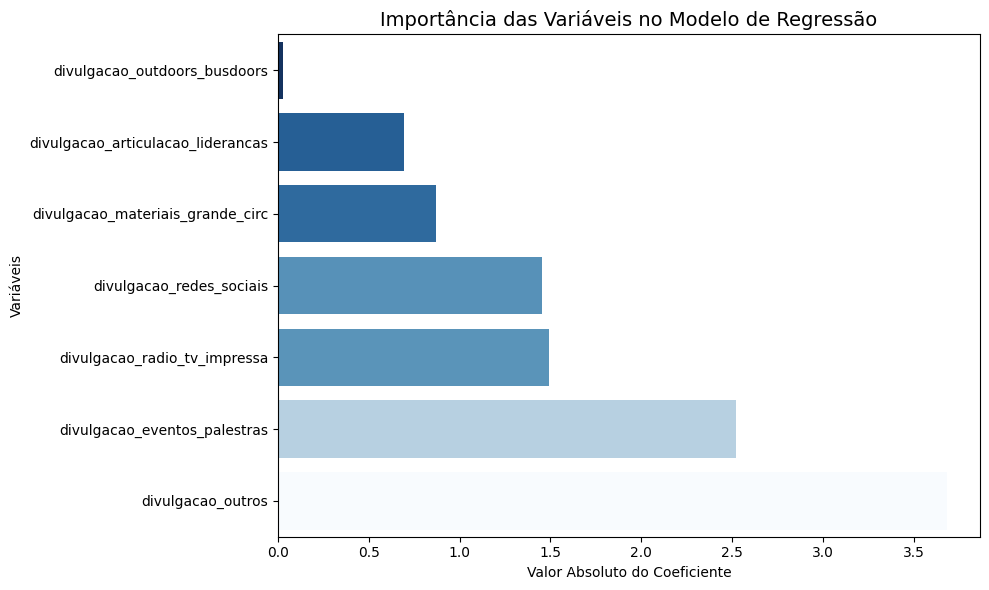

In [33]:
# Ordenar os coeficientes em termos absolutos (exceto o intercepto)
coeficientes_sem_intercepto = coeficientes.drop('const').abs().sort_values()

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=coeficientes_sem_intercepto, y=coeficientes_sem_intercepto.index, palette="Blues_r", hue=coeficientes_sem_intercepto, legend=False)

# Adicionar rótulos e títulos
plt.title("Importância das Variáveis no Modelo de Regressão", fontsize=14)
plt.xlabel("Valor Absoluto do Coeficiente")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()